## DecisionTree.CLTree
Attribute
    ----------
    feature :   np.array([int])
        feature[i] denotes the split  index for node i
    threshold_left : np.array([float]) 
        threshold_left[i]:denotes the split threshold  for node i <=sL
    threshold_right : np.array([float]) 
        threshold_left[i]:denotes the split threshold  for node i >=sL:
    children_left :  np.array([int])
        children_left[i] holds the node id of the left child of node i.
    children_right :  np.array([int])
        children_right[i] holds the node id of the left child of node i.
    leaves : dict
        Contains leaf nodes 
    vol : float
        Volume of the tree  = prod(x_imax-x_imin for i)
    total_sample: int
        The number of total training samples
    root_gain: float 
        The initial score (1-p0^2-p1^2)  (- /minus ) the best score for the first split
    density {ID: density}
    density_X {ID: density}
  
    Examples
         0
       1    2
      3 4  5 6
    7
    feature :   np.array([0,1,1,2,1,0,1])
    children_left  [1,3,5,7,-1,-1,-1,-1]
    children_right  [2,4,6,-1,-1,-1,-1,-1]
    threshold  [0.5,0.19,1,3...]

    Parameter:
    ----------
    X : np.darray
        The input data
    min_samples_leaf : int
        The minimum number of samples required to be at a leaf node:
    max_depth : int 
        maximum depth of the tree to stop
    gain_ratio_threshold: float
        If (ini_score-best_score)/root_gain < threshold , then split

In [1]:
n=500
import numpy as np
from math import floor, ceil
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification
X, y = make_classification(n_samples=n,n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)
moon=make_moons(n_samples=n,noise=0.3, random_state=0)
circle=make_circles(n_samples=n,noise=0.2, factor=0.5, random_state=1)

#---------------
import math
x11=np.linspace(0, 4, num=250)
x12=np.linspace(6, 10, num=250)
x1=np.concatenate((x11, x12), axis=0)
x2=map(lambda x:np.sin(x)+np.random.normal(0,0.2),x1 )
X=np.array([x1,x2]).T
y=[1]*len(x1)
sin=(X,y)
#---------------
data=[linearly_separable,moon,circle,sin]

############
############
############
############


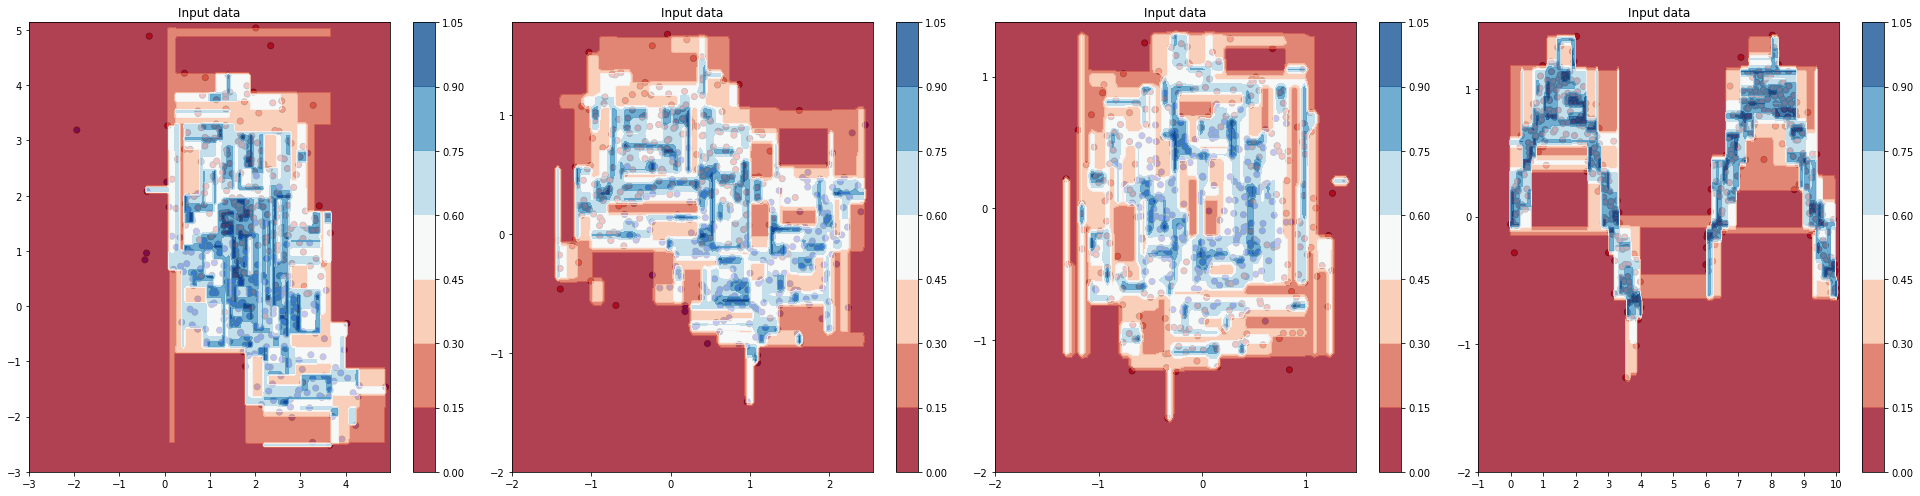

In [2]:
from DecisionTree import CLTree
figure = plt.figure(figsize=(27, 7))
i=1
for X,y in data:
    h=0.05
    x1_min, x1_max = X.T[0].min() - .1, X.T[0].max() + .1
    x2_min, x2_max = X.T[1].min() - .1, X.T[1].max() + .1
    xx, yy = np.meshgrid(np.arange(x1_min-1, x1_max+1, h),np.arange(x2_min-1, x2_max+1, h))
    tree=CLTree(criterion='gini',  min_samples_leaf=1, max_depth=30,gain_ratio_threshold=0.0001,)
    tree.fit(X,max_feature_p=1,max_try_p=0.4)
    Z=tree.predict(np.c_[xx.ravel(), yy.ravel()],threshold=tree.ICDF_threshold(0.1))
    Z=Z.reshape(xx.shape)
    ax = plt.subplot(1, 4, i)
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax.set_title("Input data")
    ax.scatter(X.T[0], X.T[1], c=y, cmap=cm_bright,edgecolors='k')
    ax.set_xlim(x1_min, x1_max)
    ax.set_ylim(x2_min, x2_max)
    ax.set_xticks(range(int(floor(x1_min)),int(ceil(x1_max))))
    ax.set_yticks(range(int(floor(x2_min)),int(ceil(x2_max))))
    cntr1 = ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    cbar0 = plt.colorbar( cntr1,)
    i+=1
plt.tight_layout()
plt.show()



############
############
############
############
############
############
############
############
############
############
############
############
############
############
############
############
############
############
############
############
############
############
############
############
############
############
############
############
############
############
############
############
############
############
############
############
############
############
############
############


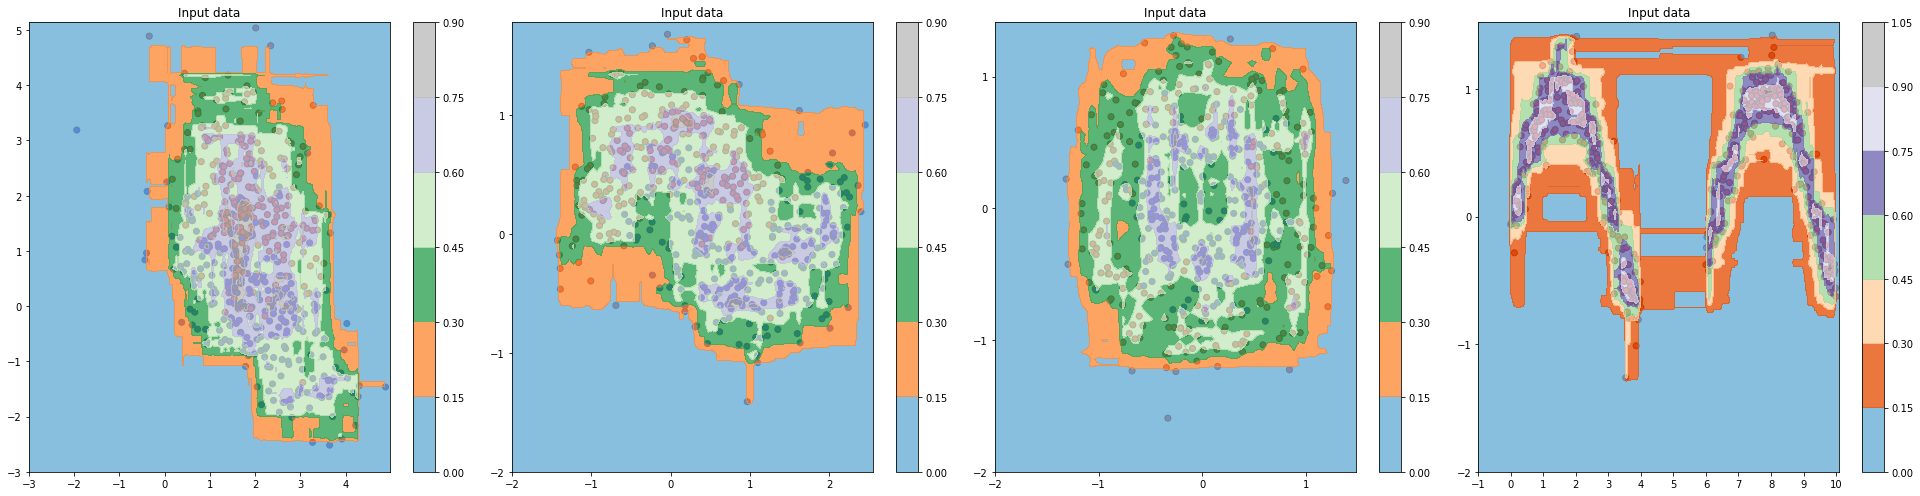

In [3]:
from RandomForest import *
figure = plt.figure(figsize=(27, 7))
i=1
for X,y in data:
    h=0.05
    x1_min, x1_max = X.T[0].min() - .1, X.T[0].max() + .1
    x2_min, x2_max = X.T[1].min() - .1, X.T[1].max() + .1
    xx, yy = np.meshgrid(np.arange(x1_min-1, x1_max+1, h),np.arange(x2_min-1, x2_max+1, h))
    rf=RandomForestClassifier(nb_trees=10, pec_samples=0.4, max_workers=4,\
    criterion='gini', min_samples_leaf=1, max_depth=30,gain_ratio_threshold=0.01,\
                             max_feature_p=1,max_try_p=0.5)
    rf.fit(X)
    Z= rf.predict(np.c_[xx.ravel(), yy.ravel()],0.1)
    Z=Z.reshape(xx.shape)
    ax = plt.subplot(1, 4, i)
#     cm = plt.cm.RdBu
    cm= plt.cm.tab20c
    ax.set_title("Input data")
    ax.scatter(X.T[0], X.T[1], c=y, cmap=cm_bright,edgecolors='k')
    ax.set_xlim(x1_min, x1_max)
    ax.set_ylim(x2_min, x2_max)
    ax.set_xticks(range(int(floor(x1_min)),int(ceil(x1_max))))
    ax.set_yticks(range(int(floor(x2_min)),int(ceil(x2_max))))
    cntr1 = ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    cbar0 = plt.colorbar( cntr1,)
    # for leaf_key in tree.leaves.keys():
        # print tree.leaves[leaf_key].X,tree.leaves[leaf_key].depth, leaf_key
    i+=1
plt.tight_layout()
plt.show()

